# Homework 2: Trees and Calibration


## Instructions

Please push the .ipynb, .py, and .pdf to Github Classroom prior to the deadline. Please include your UNI as well.

**Make sure to use the dataset that we provide in CourseWorks/Classroom.**

**There are a lot of applied questions based on the code results. Please make sure to answer them all. These are primarily to test your understanding of the results your code generate (similar to any Data Science/ML case study interviews).**

Due Date : 10/14 (October 14th), 11:59 PM EST

## Name: Elia Lejzerowicz

## UNI: eel2157

## The Dataset

### Acknowledgements

Big Thanks to https://www.superdatascience.com/pages/deep-learning

Banner Photo by Sharon McCutcheon on Unsplash

### Description

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Question 1: Decision Trees

**1.1: Load the provided dataset**

In [82]:
df = pd.read_csv("HW2_dataset.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**1.2: Plot % of missing values in each column. Would you consider dropping any columns? Assuming we want to train a decision tree, would you consider imputing the missing values? If not, why? (Remove the columns that you consider dropping)**

RowNumber          0.0000
CustomerId         0.0000
Surname            0.0000
CreditScore        0.0441
Geography          0.0000
Gender             0.0000
Age                0.0000
Tenure             0.0000
Balance            0.0123
NumOfProducts      0.0000
HasCrCard          0.0000
IsActiveMember     0.0000
EstimatedSalary    0.0800
Exited             0.0000
dtype: float64


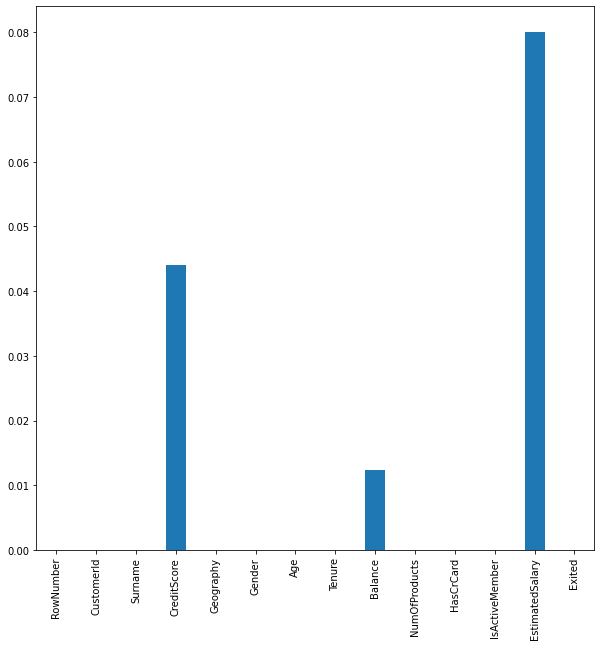

In [83]:
fig = plt.figure(figsize=(10,10))
null = df.isnull().sum()/len(df)
print(null)

null.plot.bar()
plt.show()

Since the number of missing values are minimal, I will just input the missing values of with the mean of the column.
I am not considering dropping anything.
(I could also have dropped the rows of those 3 columns)

In [84]:
#Input as the mean for balance
df["Balance"] = df["Balance"].fillna(df["Balance"].mean())
df["EstimatedSalary"] = df["Balance"].fillna(df["Balance"].mean())
df["CreditScore"] = df["Balance"].fillna(df["Balance"].mean())

df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,0.00,France,Female,42,2,0.00,1,1,1,0.00,1
1,2,15647311,Hill,83807.86,Spain,Female,41,1,83807.86,1,0,1,83807.86,0
2,3,15619304,Onio,159660.80,France,Female,42,8,159660.80,3,1,0,159660.80,1
3,4,15701354,Boni,0.00,France,Female,39,1,0.00,2,0,0,0.00,0
4,5,15737888,Mitchell,125510.82,Spain,Female,43,2,125510.82,1,1,1,125510.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,0.00,France,Male,39,5,0.00,2,1,0,0.00,0
9996,9997,15569892,Johnstone,57369.61,France,Male,35,10,57369.61,1,1,1,57369.61,0
9997,9998,15584532,Liu,0.00,France,Female,36,7,0.00,1,0,1,0.00,1
9998,9999,15682355,Sabbatini,75075.31,Germany,Male,42,3,75075.31,2,1,0,75075.31,1


Lets now check if we have missing values anymore

In [85]:
fig = plt.figure(figsize=(10,10))
null = df.isnull().sum()/len(df)
print(null)



RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64


<Figure size 720x720 with 0 Axes>

Let us viziualize if the dataset is imbalanced for the target (the "Exited"):


7963 2037


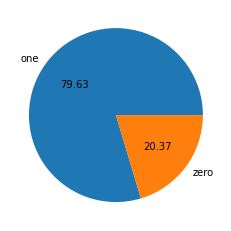

In [86]:
one = (df["Exited"] == 0).sum()
zero= (df["Exited"] == 1).sum()
print(one, zero)
data = [one,zero]
plt.pie(data, labels = ["one","zero"], autopct = '%.2f')
plt.show()

We indeed notice that there are way more One's than zero. So the target is imbalanced.
There are way more people (80%) that exited than people that didn't exited (20%)

In [87]:
#check if its different customers
print(len(pd.unique(df["CustomerId"])))


10000


Since there ae no different customers, we can not take id into account when doint the analysis

**1.3: Plot side-by-side bars of class distribtuion for each category for the categorical feature and the target categories.**

**Clarification with Example below : Here `flWinner` is the Target Variable and `descMapName` is a categorical feature. You are required to make such side-by-side bar plot for each categorical feature with repect to it's class distribution with the target feature for our dataset.**

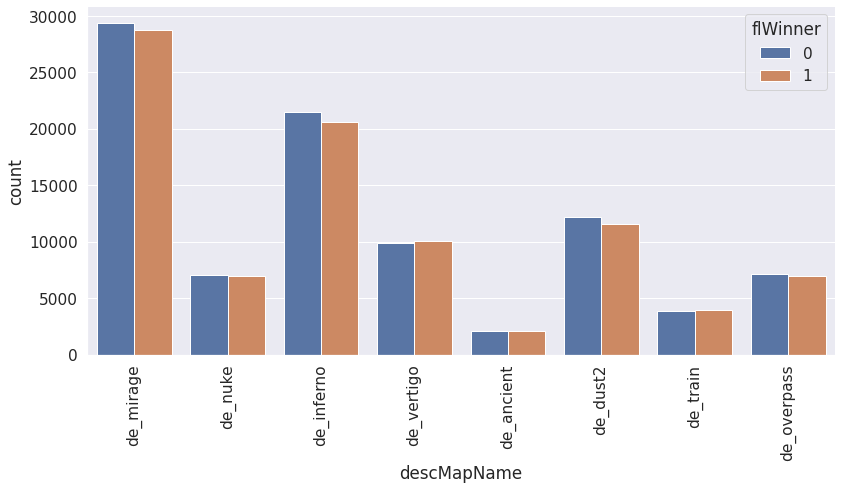

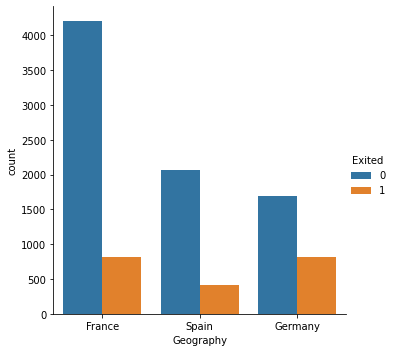

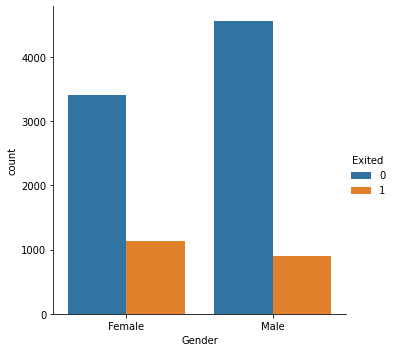

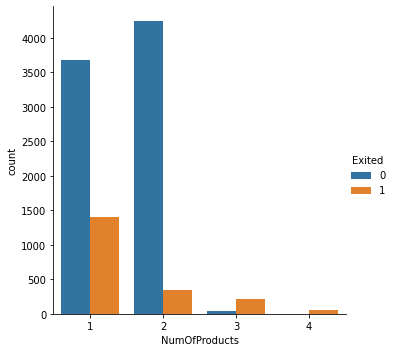

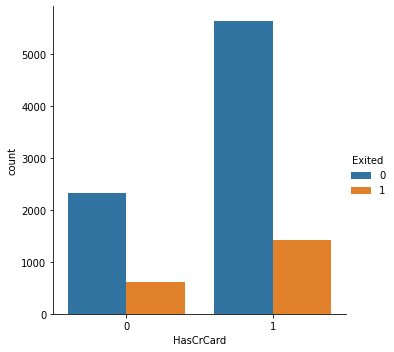

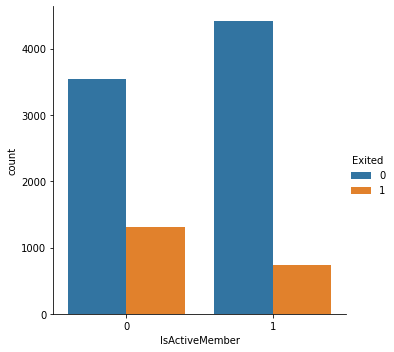

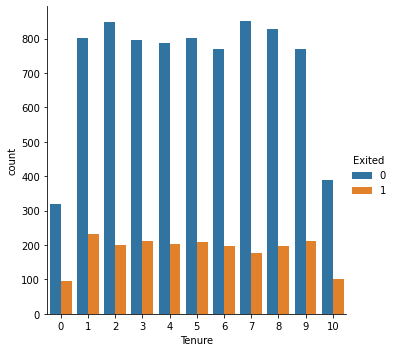

In [88]:
categorical = ["Geography","Gender","NumOfProducts",	"HasCrCard","IsActiveMember","Tenure"]
for col in categorical:
    sns.catplot(x = col, hue = "Exited", kind = 'count', data = df)

plt.show()

**1.4: Split the data into development and test datasets. Which splitting methodology did you choose and why?**

In [89]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ["Exited"])
y = df["Exited"]

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=0)




I chose this splitting strategy because I want a test dataset to evaluate the performance of my final 
optimal model. I also split at random because I think that the order of the dataset don't matter for the model.

In [90]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,0.00,France,Female,42,2,0.00,1,1,1,0.00,1
1,2,15647311,Hill,83807.86,Spain,Female,41,1,83807.86,1,0,1,83807.86,0
2,3,15619304,Onio,159660.80,France,Female,42,8,159660.80,3,1,0,159660.80,1
3,4,15701354,Boni,0.00,France,Female,39,1,0.00,2,0,0,0.00,0
4,5,15737888,Mitchell,125510.82,Spain,Female,43,2,125510.82,1,1,1,125510.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,0.00,France,Male,39,5,0.00,2,1,0,0.00,0
9996,9997,15569892,Johnstone,57369.61,France,Male,35,10,57369.61,1,1,1,57369.61,0
9997,9998,15584532,Liu,0.00,France,Female,36,7,0.00,1,0,1,0.00,1
9998,9999,15682355,Sabbatini,75075.31,Germany,Male,42,3,75075.31,2,1,0,75075.31,1


**1.5: Preprocess the data (Handle the Categorical Variable). Do we need to apply scaling? Briefly Justify**

In [91]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

#num_features_to_scale = ["Age"]
num_features = ["Age","Tenure",	"Balance","NumOfProducts",	"HasCrCard",	"IsActiveMember","EstimatedSalary"]

ohe_features = ["Geography","Gender"]

target = df['Exited']

mixed_df = df[num_features + ohe_features]

#Here I split again (redo it ) because I do'nt take into account the id, name etc
X_dev, X_test, y_dev, y_test = train_test_split(mixed_df, target, test_size=0.2, random_state=0)

preprocess = make_column_transformer((StandardScaler(),num_features),  (OneHotEncoder(handle_unknown= "ignore"), ohe_features), remainder = "passthrough")

preprocess.fit_transform(mixed_df, target)



array([[ 0.29351742, -1.04175968, -1.23204686, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.19816383, -1.38753759,  0.11912313, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.29351742,  1.03290776,  1.34204204, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.27860412,  0.68712986, -1.23204686, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.29351742, -0.69598177, -0.02166509, ...,  0.        ,
         0.        ,  1.        ],
       [-1.04143285, -0.35020386,  0.86614575, ...,  0.        ,
         1.        ,  0.        ]])

We don't need to scale since we split feature based on largest information gain.  Therefore, it doesn't matter if we scale it or not. 

**1.6: Fit a Decision Tree on the development data until all leaves are pure. What is the performance of the tree on the development set and test set? Provide metrics you believe are relevant and briefly justify.**

score train: 0.995125
score trest: 0.7985
precision: 0.6948403785204825
recall: 0.714319439606796
F1score: 0.7032740359995597

confusion matrix:


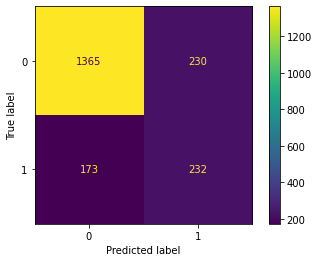

In [105]:
from sklearn import tree
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix,ConfusionMatrixDisplay


Decision_tree = tree.DecisionTreeClassifier()
pipe = make_pipeline(preprocess,Decision_tree)
pipe.fit(X_dev, y_dev)

print("score train:", pipe.score(X_dev, y_dev))
print("score trest:",pipe.score(X_test, y_test))

y_pred = pipe.predict(X_test)

metrics = precision_recall_fscore_support(y_test, y_pred,average='macro')


#I am adding those ways of evaluation because the target data is imbalanced 
print("precision:", metrics[0])
print("recall:",metrics[1])
print("F1score:",metrics[2])

print("")
print("confusion matrix:")
confusion_matrix(y_test, y_pred)


cm = confusion_matrix(y_test, y_pred, labels=Decision_tree.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=Decision_tree.classes_).plot()
plt.show()



**1.7: Visualize the trained tree until the max_depth 8**

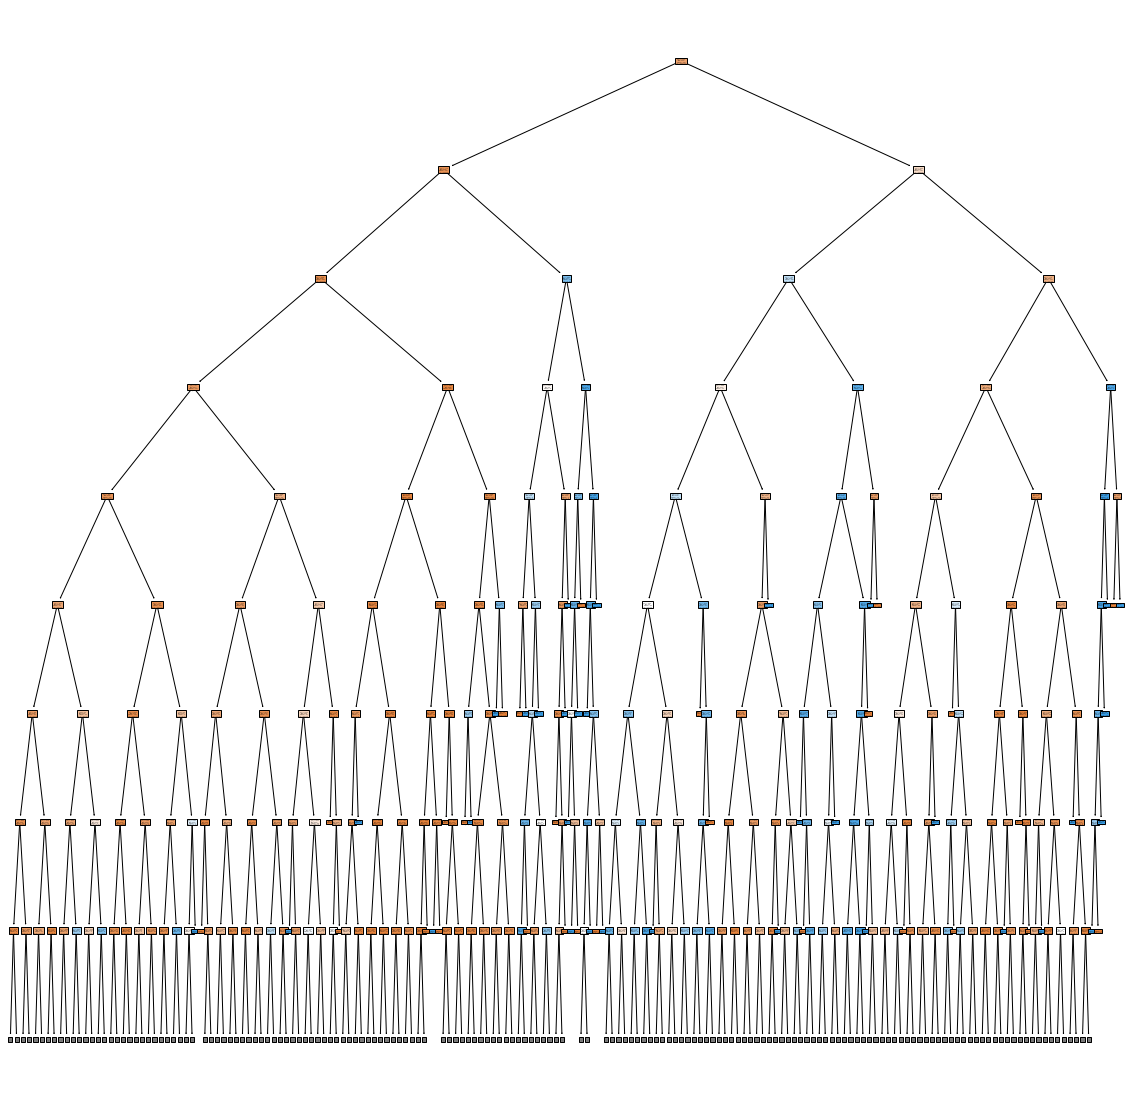

In [93]:
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(Decision_tree, filled=True, max_depth=8)

**1.8: Prune the tree using one of the techniques discussed in class and evaluate the performance**

In [106]:
prun = pipe[-1].cost_complexity_pruning_path(preprocess.fit_transform(X_dev), y_dev, sample_weight=None)
alphas = prun["ccp_alphas"]

#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=cost_complexity_pruning_path#sklearn.tree.DecisionTreeClassifier.cost_complexity_pruning_path

In [95]:
y_test.shape[0]

2000

The best accuracy on the test data is  0.00047025070621468934
The best alpha for this score is  0.8635
score test: 0.8635
precision: 0.8132626846499679
recall: 0.726518054104261
F1score: 0.7567251461988304

confusion matrix:


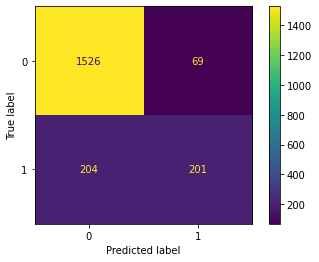

In [107]:
best_DT = 0
best_accuracy = 0.0
best_alpha = 0
length = y_test.shape[0]

for alpha in alphas:

  Decision_tree = tree.DecisionTreeClassifier(ccp_alpha= alpha)
  pipe = make_pipeline(preprocess,Decision_tree)
  pipe.fit(X_dev, y_dev)

  y_pred = pipe.predict(X_test)

  accuracy_test = sum(np.where(y_pred == y_test, 1, 0))/length
    
  if accuracy_test > best_accuracy:
    best_alpha = alpha
    best_accuracy = accuracy_test
    best_DT = Decision_tree
    best_pipe = pipe

best_pipe.fit(X_dev, y_dev)


y_pred = best_pipe.predict(X_test)
  

print("The best accuracy on the test data is ",best_alpha )
print("The best alpha for this score is ", best_accuracy)


metrics = precision_recall_fscore_support(y_test, y_pred,average='macro')
print("score test:", best_pipe.score(X_test,y_test))
print("precision:", metrics[0])
print("recall:",metrics[1])
print("F1score:",metrics[2])


print("")
print("confusion matrix:")
confusion_matrix(y_test, y_pred)


cm = confusion_matrix(y_test, y_pred, labels=Decision_tree.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=Decision_tree.classes_).plot()
plt.show()





**1.9: List the top 3 most important features for this trained tree? How would you justify these features being the most important?**

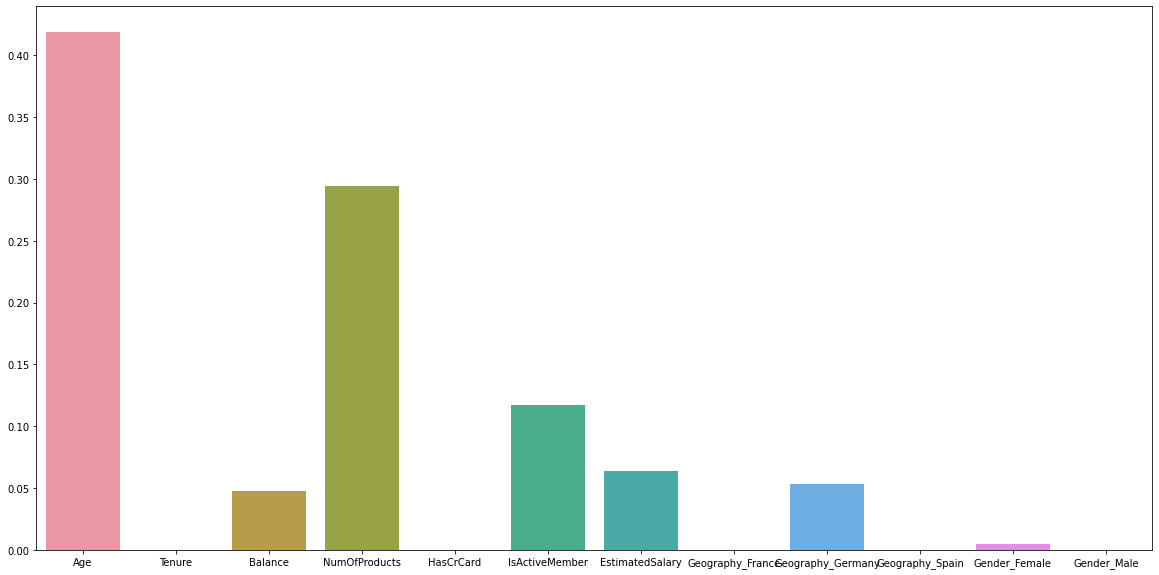

In [108]:
fig = plt.figure(figsize = (20,10))
ohe_features_names = preprocess.named_transformers_["onehotencoder"].get_feature_names_out().tolist()

#features_names = ohe_features_names + num_features
features_names =  num_features + ohe_features_names 
sns.barplot(x = features_names, y =  best_DT.feature_importances_)

plt.show()


The three most important features looks to be Age, NumOf product and ISActiveMember

## Question 2: Random Forests

**2.1: Train a Random Forest model on the development dataset using RandomForestClassifier class in sklearn. Use the default parameters. Evaluate the performance of the model on test dataset. Does this perform better than Decision Tree on the test dataset (compare to results in Q 1.6)?**

score test: 0.856
precision: 0.787137497609042
recall: 0.7347110956306359
F1score: 0.7555672113783463

confusion matrix:


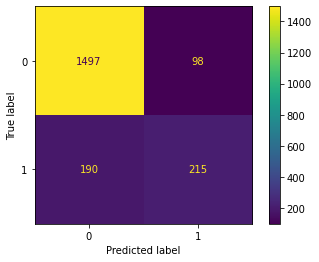

In [98]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
pipe_rf = make_pipeline(preprocess, rf)
pipe_rf.fit(X_dev, y_dev)

y_pred = pipe_rf.predict(X_test)

metrics = precision_recall_fscore_support(y_test, y_pred,average='macro')
print("score test:", pipe_rf.score(X_test,y_test))
print("precision:", metrics[0])
print("recall:",metrics[1])
print("F1score:",metrics[2])


print("")
print("confusion matrix:")
confusion_matrix(y_test, y_pred)


cm = confusion_matrix(y_test, y_pred, labels=Decision_tree.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=Decision_tree.classes_).plot()
plt.show()


Decision tree evaluation VS Random Forest Eval      
- score test DT: 0.80 VS 0.84 RF          
- precision DT: 0.69 VS 0.76 RF
- recall DT: 0.72 VS 0.729 RF
- F1score DT: 0.70 VS  0.74

We clearly see that the Random Forest performs better


**2.2: Does all trees in the trained random forest model have pure leaves? How would you verify this?**

In [99]:
def bfs(T):
  impurity= T.tree_.impurity
  impurity_list = []
  
  left_child = T.tree_.children_left
  right_child = T.tree_.children_right
    
  q = [0]
  while q:
    cur_node = q.pop(0)
    if left_child[cur_node] == right_child[cur_node]:

      impurity_list.append(impurity[cur_node])
    else:
      q.append(left_child[cur_node])
      q.append(right_child[cur_node])
  return impurity_list

trees = rf.estimators_
Flag = True
for tree in trees:
    impurities = bfs(tree)
    for node in impurities:
      if node != 0:
        flag = False
      
print(Flag)


True


We can see that all the trees have pure leaves by checking the impurities of all leaves. If all of them are 0, then its all pure leaves

**2.3: Assume you want to improve the performance of this model. Also, assume that you had to pick two hyperparameters that you could tune to improve its performance. Which hyperparameters would you choose and why?**


Those are the two hyper-parameters I would choose:
- The number of trees in the forest.
- The max Depth of the tree

It is the paramaters that, with changes, can provide a different score because it changes the way the model behaves.
For example, if the model goes to deep (max depth), it could overfitt. Therefore, if we tune our model to find the best optimal depth, we could prevent from overfitting.

Regarding the number of trees, a higher number could increase the performance so it is a good option to test with different numbers in order to find the optimal one

**2.4: Now, assume you had to choose up to 5 different values (each) for these two hyperparameters. How would you choose these values that could potentially give you a performance lift?**

I would randomly choose values that differ from each other and could be very representative (with a min and a max)

**2.5: Perform model selection using the chosen values for the hyperparameters. Use cross-validation for finding the optimal hyperparameters. Report on the optimal hyperparameters. Estimate the performance of the optimal model (model trained with optimal hyperparameters) on test dataset? Has the performance improved over your plain-vanilla random forest model trained in Q2.1?**

model performance on tain dataset 0.90025
model performance on testdataset 0.8665
precision: 0.8219260578131546
recall: 0.7283989318472077
F1score: 0.7603703758550266

confusion matrix:


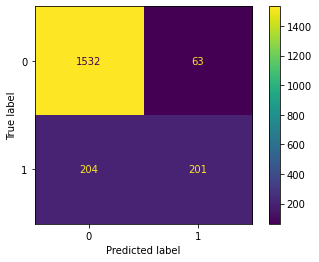

In [100]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators' : [50, 100, 200,300],
          'max_depth' : [3, 10, 20, 40]}

#gs = GridSearchCV(RandomForestClassifier(), params, verbose = 5, scoring = 'accuracy')
gs = GridSearchCV(RandomForestClassifier(), params, cv = 3)
best_pipe_rf = make_pipeline(preprocess, gs)

best_pipe_rf.fit(X_dev, y_dev)

print("best parameters are", gs.best_params_)

print("model performance on tain dataset", best_pipe_rf.score(X_dev, y_dev))
print("model performance on testdataset", best_pipe_rf.score(X_test, y_test))


y_pred = best_pipe_rf.predict(X_test)

metrics = precision_recall_fscore_support(y_test, y_pred,average='macro')

print("precision:", metrics[0])
print("recall:",metrics[1])
print("F1score:",metrics[2])


print("")
print("confusion matrix:")
confusion_matrix(y_test, y_pred)


cm = confusion_matrix(y_test, y_pred, labels=Decision_tree.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=Decision_tree.classes_).plot()
plt.show()


We can observe that the performance improved with hyper-parameter tuning.

- score testdataset 0.867 with hyparam VS 0.84 without
- precision: 0.82 with hyparam VS 0.76 without
- recall: 0.73 with hyparam VS 0.729 without
- F1score: 0.76 with hyparam VS 0.74 without


We clearly see that there is an improvement in the performance

**2.6: Can you find the top 3 most important features from the model trained in Q2.5? How do these features compare to the important features that you found from Q1.9? If they differ, which feature set makes more sense?**

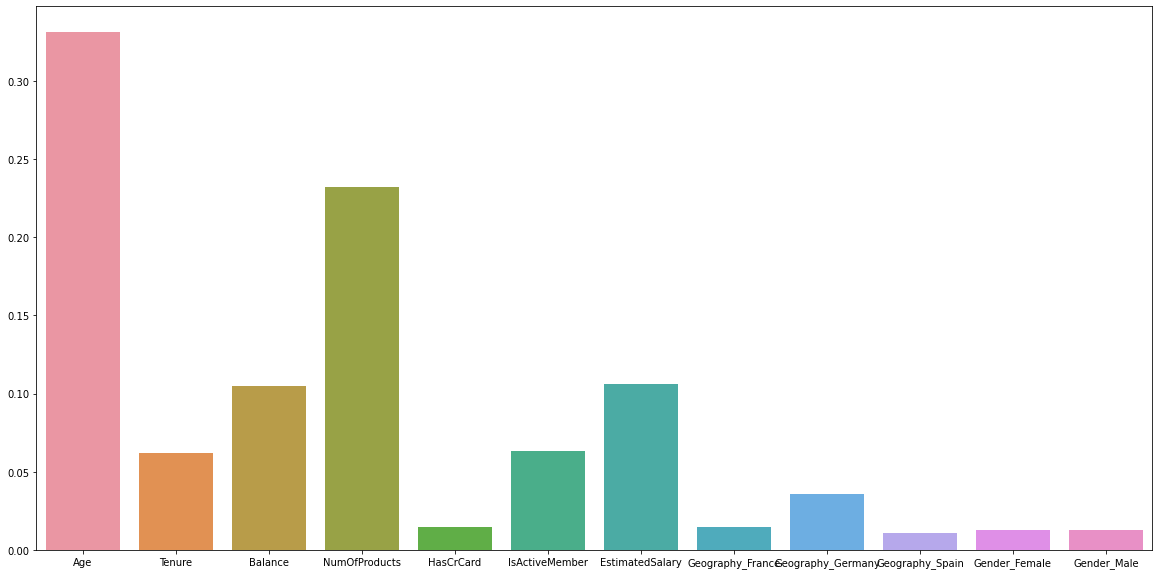

In [102]:
fig = plt.figure(figsize = (20,10))

ohe_features_names = preprocess.named_transformers_["onehotencoder"].get_feature_names_out().tolist()

#features_names = ohe_features_names + num_features
features_names =  num_features + ohe_features_names 

sns.barplot(x = features_names, y = gs.best_estimator_.feature_importances_)


Now the most important features are Age, Num of Product and Balance.  We see that in this model Tenure, balance and estimated salary are more important than before.
I think that this one makes more sence since it takes more features as most important that looks relevant. Also age have a lower weight. The features looks more balance.

## Question 3: Gradient Boosted Trees

**3.1: Choose three hyperparameters to tune GradientBoostingClassifier and HistGradientBoostingClassifier on the development dataset using 5-fold cross validation. Report on the time taken to do model selection for both the models. Also, report the performance of the test dataset from the optimal models.**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time

start_time = time.time()

params = {'min_samples_split' : [2,10,50],
          'learning_rate' : [0.1,7,100],
          'n_estimators' : [20, 40, 70]}

gs2 = GridSearchCV(GradientBoostingClassifier(), params, cv = 5)

best_pipe_GBC = make_pipeline(preprocess, gs2)

best_pipe_GBC.fit(X_dev, y_dev)

print("Time: {} seconds".format(time.time() - start_time))

print("best parameters are", gs2.best_params_)

print("model performance on test dataset", best_pipe_GBC.score(X_test, y_test))

y_pred = best_pipe_GBC.predict(X_test)

metrics = precision_recall_fscore_support(y_test, y_pred,average='macro')

print("precision:", metrics[0])
print("recall:",metrics[1])
print("F1score:",metrics[2])

print("")
print("confusion matrix:")
confusion_matrix(y_test, y_pred)


cm = confusion_matrix(y_test, y_pred, labels=Decision_tree.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=Decision_tree.classes_).plot()
plt.show()


In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier 

start_time = time.time()

params = {"max_depth": [5, 10],
            "learning_rate": [0.1, 1],
             'l2_regularization': np.logspace(-1, 2, 2)}

gs = GridSearchCV(HistGradientBoostingClassifier(), params, cv = 5)
best_pipe_HGB = make_pipeline(preprocess, gs)

best_pipe_HGB.fit(X_dev, y_dev)

print("Time: {} seconds".format(time.time() - start_time))

print("best parameters are", gs.best_params_)

print("model performance on test dataset", best_pipe_HGB.score(X_test, y_test))


y_pred = best_pipe_HGB.predict(X_test)

metrics = precision_recall_fscore_support(y_test, y_pred,average='macro')

print("precision:", metrics[0])
print("recall:",metrics[1])
print("F1score:",metrics[2])

print("")
print("confusion matrix:")
confusion_matrix(y_test, y_pred)


cm = confusion_matrix(y_test, y_pred, labels=Decision_tree.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=Decision_tree.classes_).plot()
plt.show()


**3.2: Train an XGBoost model by tuning 3 hyperparameters using 10 fold cross-validation. Compare the performance of the trained XGBoost model on the test dataset against the performances obtained from 3.1**

best parameters are {'eta': 0.01, 'lambda': 0.001, 'max_depth': 5}
model performance on testdataset 0.8695
precision: 0.821107882727601
recall: 0.7422539571964859
F1score: 0.7711809910142512

confusion matrix:


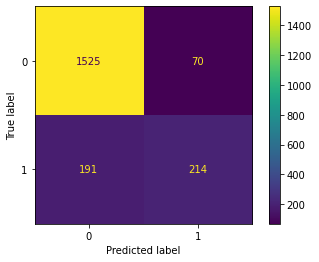

In [111]:
from xgboost import XGBClassifier

params = {'max_depth': [5, 10],
          'eta': np.logspace(-2, 1, 2),
          'lambda': np.logspace(-3, 1, 2)}

gs3 = GridSearchCV(XGBClassifier(), params, cv = 10)
best_pipe_XGB = make_pipeline(preprocess, gs3)

best_pipe_XGB.fit(X_dev, y_dev)

print("best parameters are", gs3.best_params_)
print("model performance on testdataset", best_pipe_XGB.score(X_test, y_test))

y_pred = best_pipe_XGB.predict(X_test)

metrics = precision_recall_fscore_support(y_test, y_pred,average='macro')

print("precision:", metrics[0])
print("recall:",metrics[1])
print("F1score:",metrics[2])

print("")
print("confusion matrix:")
confusion_matrix(y_test, y_pred)


cm = confusion_matrix(y_test, y_pred, labels=Decision_tree.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=Decision_tree.classes_).plot()
plt.show()

The performance don't change too much..


**3.3: Compare the results on the test dataset from XGBoost, HistGradientBoostingClassifier, GradientBoostingClassifier with results from Q1.6 and Q2.1. Which model tends to perform the best and which one does the worst? How big is the difference between the two? Which model would you choose among these 5 models and why?**

Let us compare the different results:

**Decision Tree: (1.6)**

- score trest: 0.802
- precision: 0.69965002487741
- recall: 0.7192770618057974
- F1score: 0.7081845393810859


**Random Forest: (2.1)**

- score: 0.8475
- precision: 0.7688713482126656
- recall: 0.7293819420256202
- F1score: 0.7458095029742371

** Random Forest With Hyperparam**


- model performance on testdataset 0.868
- precision: 0.8255963365008067
- recall: 0.7302604589960913
- F1score: 0.762779363242303


**Gradient Boosting:**

- model performance on test dataset 0.867
- precision: 0.8189723320158102
- recall: 0.7342389411354928
- F1score: 0.7643515237420269

**Histogram Classifier:**

- model performance on test dataset 0.8685
- precision: 0.8165402136601327
- recall: 0.7443902627810673
- F1score: 0.7715219979575978

**XGB:**

- model performance on testdataset 0.8695
- precision: 0.821107882727601
- recall: 0.7422539571964859
- F1score: 0.7711809910142512


We can observe that we have better results with XGB, Histogram classifier and GradientBoosting Classifier. The best looks to be XGB. The worst looks to be the Decision Tree. The difference is not that big though. I would choose XBG because it provides good evaluation.

**3.4: Can you list the top 3 features from the trained XGBoost model? How do they differ from the features found from Random Forest and Decision Tree? Which one would you trust the most?**

We can observe from below that the most 3 important features are Age, Num of product and Is active

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


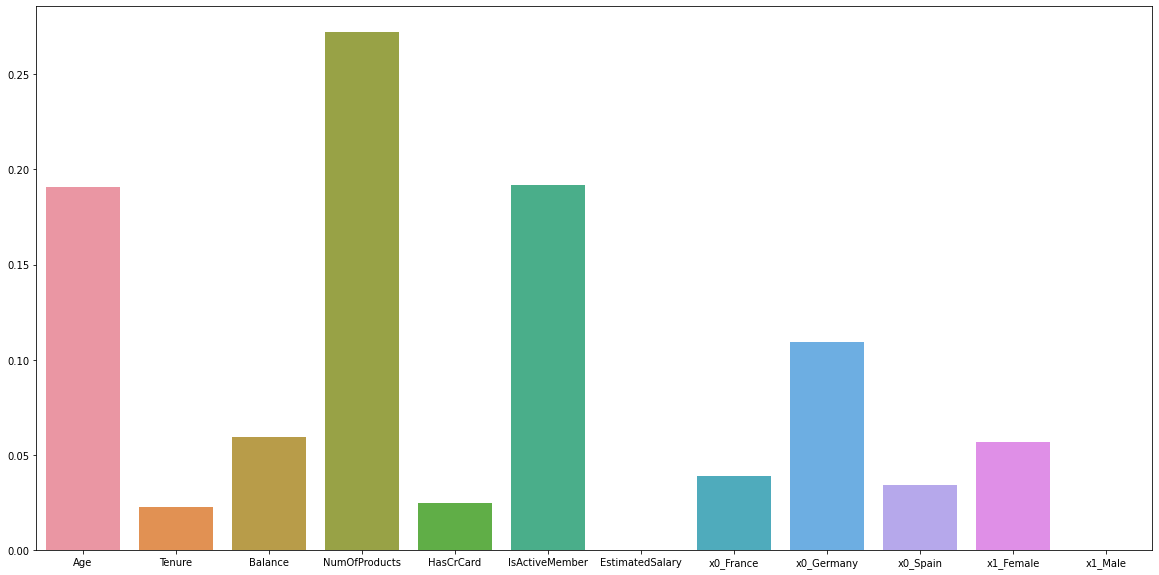

In [112]:
fig = plt.figure(figsize = (20,10))

ohe_features_names = preprocess.named_transformers_["onehotencoder"].get_feature_names().tolist()

#features_names = ohe_features_names + num_features
features_names =  num_features + ohe_features_names 

sns.barplot(x = features_names, y = gs3.best_estimator_.feature_importances_)

In this model, there are less importance on the age and more on the number of product and if the member is active. I would trust this model more because it makes more sence for me.

**3.5: Can you choose the top 7 features (as given by feature importances from XGBoost) and repeat Q3.2? Does this model perform better than the one trained in Q3.2? Why or why not is the performance better?**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


best parameters are {'eta': 0.01, 'lambda': 0.001, 'max_depth': 5}
model performance on testdataset 0.867
precision: 0.8106764749739053
recall: 0.741901776384535
F1score: 0.767965367965368


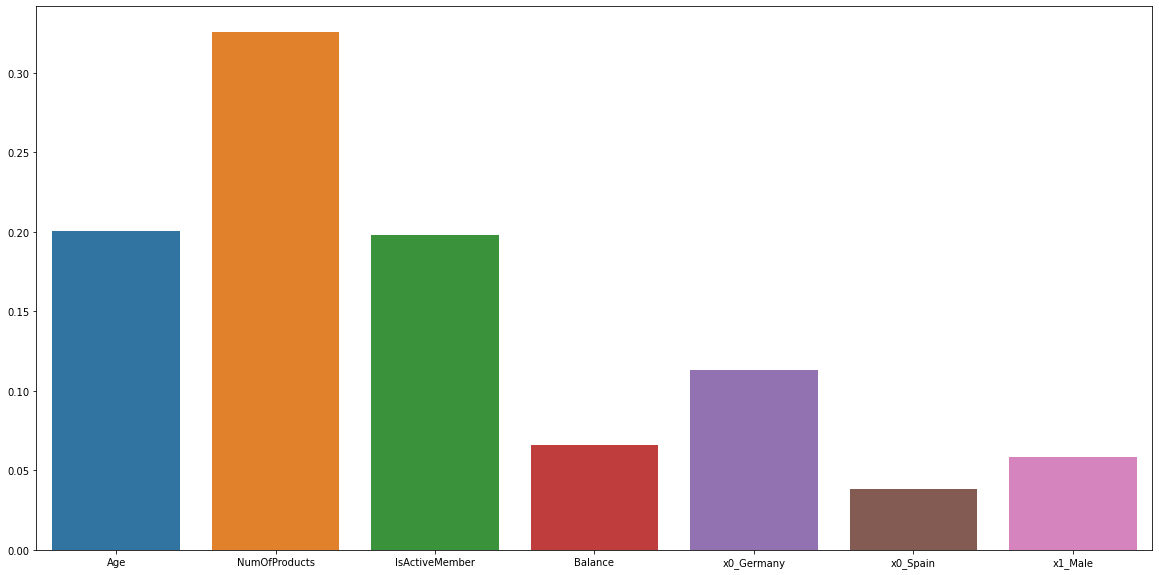

In [113]:
#The best feature 
New_X_dev = X_dev[["Age","NumOfProducts","IsActiveMember",'Geography','Balance','Gender']]


num_features = ["Age","NumOfProducts","IsActiveMember", "Balance"]
ohe_features = ['Geography','Gender']
target = df['Exited']

mixed_df = df[num_features + ohe_features]

preprocess = make_column_transformer((StandardScaler(),num_features),  (OneHotEncoder(handle_unknown= "ignore", drop = "first"), ohe_features), remainder = "passthrough")

preprocess.fit_transform(mixed_df, target)

ohe_features_names = preprocess.named_transformers_["onehotencoder"].get_feature_names().tolist()

features_names =  num_features + ohe_features_names 


gs4 = GridSearchCV(XGBClassifier(), params, cv = 3)

best_pipe_XGB = make_pipeline(preprocess, gs4)

best_pipe_XGB.fit(New_X_dev, y_dev)

print("best parameters are", gs4.best_params_)
print("model performance on testdataset", best_pipe_HGB.score(X_test, y_test))

y_pred = best_pipe_XGB.predict(X_test)

metrics = precision_recall_fscore_support(y_test, y_pred,average='macro')

print("precision:", metrics[0])
print("recall:",metrics[1])
print("F1score:",metrics[2])

fig = plt.figure(figsize = (20,10))
 
sns.barplot(x = features_names, y = gs4.best_estimator_.feature_importances_)

We see that this model performs a bit less beter than the previous one. This is because we removed features that eventhough didn't have the highest importance, still played a role in the model.

## Question 4: Calibration

**4.1: Estimate the brier score for the XGBoost model (trained with optimal hyperparameters from Q3.2) scored on the test dataset.**

In [125]:
from sklearn.metrics import brier_score_loss
from sklearn.calibration import CalibrationDisplay, CalibratedClassifierCV
y_pred = best_pipe_XGB.predict_proba(X_test)


#take all rows and 1 column
print(brier_score_loss(y_test, y_pred[:,1]))



0.09907729420943093


**4.2: Calibrate the trained XGBoost model using isotonic regression as well as Platt scaling. Plot predicted v.s. actual on test datasets from both the calibration methods**

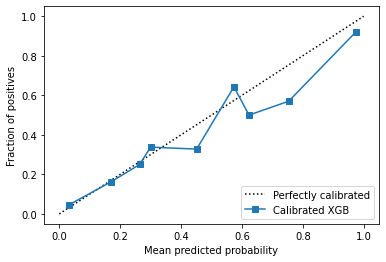

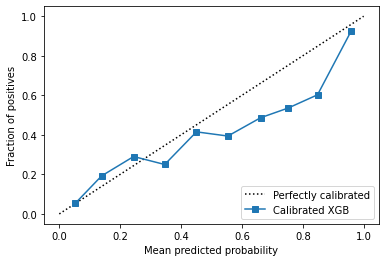

In [126]:

X_train, X_calibration, y_train, y_calibration = train_test_split(X_dev, y_dev, test_size = 0.25, random_state = 0)


cal_XGB_isotonic = CalibratedClassifierCV(best_pipe_XGB, cv = "prefit", method = "isotonic")
cal_XGB_platt = CalibratedClassifierCV(best_pipe_XGB, cv = "prefit", method = "sigmoid")

cal_XGB_isotonic.fit(X_calibration, y_calibration)
cal_XGB_platt.fit(X_calibration, y_calibration)

CalibrationDisplay.from_estimator(cal_XGB_isotonic, X_test, y_test, n_bins = 10, name = 'Calibrated XGB')
CalibrationDisplay.from_estimator(cal_XGB_platt, X_test, y_test, n_bins = 10, name = 'Calibrated XGB')

**4.3: Report brier scores from both the calibration methods. Do the calibration methods help in having better predicted probabilities?**

In [127]:
y_pred_iso = cal_XGB_isotonic.predict_proba(X_test)
print(brier_score_loss(y_test, y_pred_iso[:,1]))

y_pred_platt = cal_XGB_platt.predict_proba(X_test)
print(brier_score_loss(y_test, y_pred_platt[:,1]))

0.10150297488971889
0.10302178457936509
